### Financial Planning & Projections with Cryptocurrency Holdings

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime, timedelta
%matplotlib inline

# Set current amount of shares
my_agg = 200
my_spy = 50
# Load .env enviroment variables
load_dotenv()
# Set current amount of crypto assets
crypto_count = {
    'volume': [1.2,5.3]
}
tickers = ['btc','eth']
df_crypto = pd.DataFrame(crypto_count, index=tickers)
my_btc = df_crypto['volume'].iloc[0]
my_eth = df_crypto['volume'].iloc[1]

# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")



The current value of your 1.2 BTC is $44,682.00
The current value of your 5.3 ETH is $13,726.20


In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')


# Format current date as ISO format

N = 1000
today = pd.Timestamp(datetime.now()).isoformat()
end_date = pd.Timestamp((datetime.now() - timedelta(days=N))).isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = alpaca_api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=end_date,
    limit=N
).df

# Pick AGG and SPY close prices
agg_close_price = df_ticker['AGG']['close'].iloc[-1]
spy_close_price = df_ticker['SPY']['close'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

Current AGG closing price: $109.87
Current SPY closing price: $434.25
The current value of your 50 SPY shares is $21,712.50
The current value of your 200 AGG shares is $21,974.00


array([<AxesSubplot:ylabel='amount'>], dtype=object)

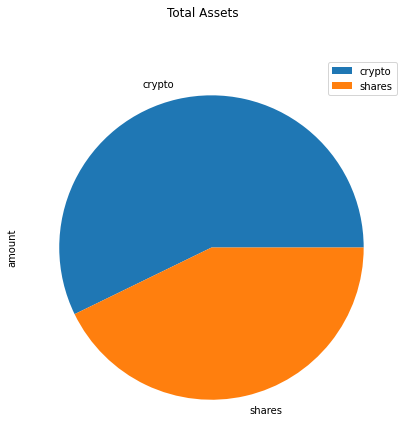

In [3]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crytpo = my_btc_value + my_eth_value
total_ticker = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame(columns=['amount'], index=['crypto', 'shares'])
df_savings.iloc[0] = total_crytpo
df_savings.iloc[1] = total_ticker

# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True, figsize=(10,7), title='Total Assets')

In [4]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
savings_percentage = total_savings/emergency_fund
def saving_health(emergency, savings):
    if emergency_fund < total_savings:
        print(f'Keep it up, your portfolio is valued at {savings_percentage:.0%} your total savings goal!')
    elif emergency_fund == total_savings:
        print(f'Congrats! you have {savings_percentage:.0%} your total savings goal!')
    else:
        print(f'WARNING! Your current potfolio balance is only {savings_percentage:.0%} your total savings goal')
saving_health(emergency_fund,total_savings)

# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

Keep it up, your portfolio is valued at 284% your total savings goal!


#### Monte Carlo Simulation

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\jteel\Documents\GitHub\Financial-Analysis_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

count           500.000000
mean             13.953155
std              10.090855
min               2.036586
25%               6.844952
50%              11.396002
75%              17.691494
max              77.461020
95% CI Lower      3.073566
95% CI Upper     41.971275
Name: 7560, dtype: float64

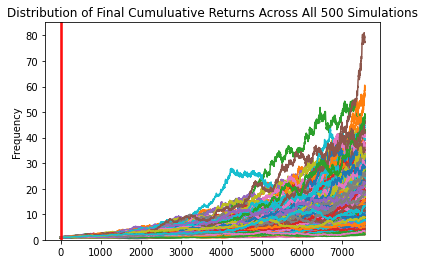

In [5]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = df_ticker.dropna()
weights = [.40, .60]

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*30
)

# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()

# Plot simulation outcomes
line_plot = MC_30.plot_simulation()
line_plot

# Plot probability distribution and confidence intervals
dist_plot_30 = MC_30.plot_distribution()
dist_plot_30

# Fetch summary statistics from the Monte Carlo simulation results
stock_sim_stats_30 = MC_30.summarize_cumulative_return()

# Print summary statistics
stock_sim_stats_30

#### Expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [6]:
# Set initial investment
initial_investment_a = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stock_sim_stats_30[8]*initial_investment_a,2)
ci_upper = round(stock_sim_stats_30[9]*initial_investment_a,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment_a:0,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $61,471.31 and $839,425.50


##### Expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [7]:
# Set initial investment
initial_investment_b = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_thirty = round(stock_sim_stats_30[8]*initial_investment_b,2)
ci_upper_thirty = round(stock_sim_stats_30[9]*initial_investment_b,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment_b:0,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $61,471.31 and $839,425.50


#### Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\jteel\Documents\GitHub\Financial-Analysis_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

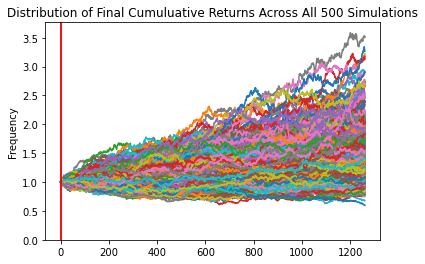

In [8]:
MC_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*5
)

# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5.calc_cumulative_return()

# Plot simulation outcomes
line_plot_five = MC_5.plot_simulation()
line_plot_five

# Plot probability distribution and confidence intervals
dist_plot = MC_5.plot_distribution()
dist_plot

# Fetch summary statistics from the Monte Carlo simulation results
stock_sim_stats_5 = MC_5.summarize_cumulative_return()


print(stock_sim_stats_5)

In [9]:
# Set initial investment
initial_investment_c = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stock_sim_stats_5[8]*initial_investment_c,2)
ci_upper_five = round(stock_sim_stats_5[9]*initial_investment_c,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment_c} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $49102.82 and $155530.85


#### Ten Years Retirement Option

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\jteel\Documents\GitHub\Financial-Analysis_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

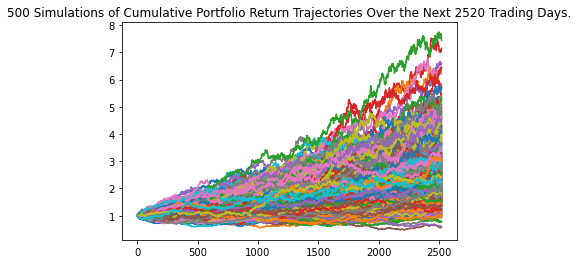

In [10]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*10
)

# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10.calc_cumulative_return()

# Plot simulation outcomes
line_plot_10 = MC_10.plot_simulation()
line_plot_10

count           500.000000
mean              2.423674
std               1.082183
min               0.572883
25%               1.668805
50%               2.178749
75%               2.922479
max               7.444300
95% CI Lower      1.033862
95% CI Upper      5.072628
Name: 2520, dtype: float64


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

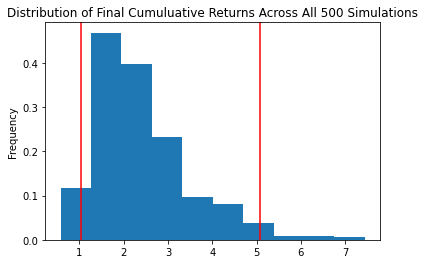

In [11]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_10.plot_distribution()

# Fetch summary statistics from the Monte Carlo simulation results
stock_sim_stats_10 = MC_10.summarize_cumulative_return()

print(stock_sim_stats_10)
dist_plot_10

In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stock_sim_stats_10[8]*initial_investment_c,2)
ci_upper_ten = round(stock_sim_stats_10[9]*initial_investment_c,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment_c} in the portfolio"
      f" over the next 10 years will end within in the range of:"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62031.75 and $304357.7
